# Project Check In 2
#### Due 4/11/25

## Introduction
#### Introduction (data origin, feature descriptions, and motivating question(s))
##### The "Crime Incidents in 2024" dataset, sourced from Data.gov, offers a detailed record of reported criminal activity by the Maryland Police Department throughout the year. Each entry typically includes the type of offense, the time and date it occurred, and the geographic location — ranging from specific coordinates to neighborhood-level data. Some records may also provide the status of the case or the outcome of the incident.This project explores the overarching question: What factors affect different types of offenses? By analyzing temporal patterns (such as time of day or day of week), geographic distribution, and other contextual variables,  our goal is to uncover how various factors influence the frequency and nature of specific crimes. Understanding these relationships can help inform public safety strategies, resource allocation, and predictive policing efforts.
Dataset contains information about crime incidents reported in the DC area in 2024. It is from the police department, and an automated process generates data about blocks, locations, and neighborhoods. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [3]:
crime = pd.read_csv("Crime_Incidents_in_2024.csv")
print(crime.shape)
crime.head(10)

(29294, 25)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399622.2700,134352.6200,24093246,2024/06/19 14:52:56+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF NEW JERSEY AVENUE SE,399622.270000,134352.620000,...,007203 1,7203.0,Precinct 131,38.877004,-77.004353,CAPITOL RIVERFRONT,2024/06/19 14:50:00+00,2024/06/19 14:52:00+00,679448603,NaN
1,398579.1351,134828.4000,24131497,2024/08/27 01:13:37+00,EVENING,OTHERS,THEFT F/AUTO,300 - 399 BLOCK OF G STREET SW,398579.135069,134828.399995,...,010500 2,10500.0,Precinct 128,38.881289,-77.016376,SOUTHWEST,2024/08/26 18:51:00+00,2024/08/26 20:14:00+00,679448604,NaN
2,396836.0500,139850.4600,24120734,2024/08/07 07:10:35+00,MIDNIGHT,OTHERS,THEFT/OTHER,16TH STREET NW AND COLUMBIA ROAD NW,396836.050011,139850.459999,...,003901 1,3901.0,Precinct 39,38.926525,-77.036488,NaN,2024/08/04 01:00:00+00,2024/08/04 01:30:00+00,679449098,NaN
3,398010.0800,138818.9400,24168124,2024/10/30 03:40:30+00,MIDNIGHT,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF 8TH STREET NW,398010.080000,138818.940000,...,003500 3,3500.0,Precinct 37,38.917236,-77.022946,NaN,2024/10/29 04:00:00+00,2024/10/29 20:00:00+00,679449103,NaN
4,397424.6800,141258.2500,24172277,2024/11/05 23:15:06+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3900 - 3999 BLOCK OF 13TH STREET NW,397424.680000,141258.250000,...,002503 1,2503.0,Precinct 47,38.939209,-77.029705,NaN,2024/11/05 22:22:00+00,NaN,679449104,NaN
5,394459.1800,141888.0400,24179469,2024/11/18 22:40:03+00,EVENING,OTHERS,THEFT/OTHER,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,394459.180000,141888.040000,...,001303 1,1303.0,Precinct 34,38.944869,-77.063916,NaN,2024/11/18 22:07:00+00,2024/11/18 22:07:00+00,679449116,NaN
6,393720.8600,140689.0000,24074542,2024/05/18 16:39:42+00,DAY,OTHERS,THEFT/OTHER,3300 - 3399 BLOCK OF WISCONSIN AVENUE NW,393720.860000,140689.000000,...,001002 4,1002.0,Precinct 29,38.934062,-77.072422,NaN,2024/05/18 15:15:00+00,2024/05/18 15:25:00+00,679449118,NaN
7,399930.5000,143088.2800,24075222,2024/05/20 02:29:20+00,EVENING,OTHERS,THEFT/OTHER,5500 - 5529 BLOCK OF SOUTH DAKOTA AVENUE NE,399930.500000,143088.280000,...,009507 1,9507.0,Precinct 65,38.955698,-77.000802,NaN,2024/05/19 21:10:00+00,2024/05/20 00:12:00+00,679449119,NaN
8,397431.2200,138854.6100,24079135,2024/05/26 10:13:12+00,MIDNIGHT,GUN,ROBBERY,2000 - 2099 BLOCK OF 13TH STREET NW,397431.220000,138854.610000,...,004401 2,4401.0,Precinct 22,38.917556,-77.029621,NaN,2024/05/26 08:34:00+00,2024/05/26 10:08:00+00,679449120,NaN
9,400530.2627,132799.0566,24080364,2024/05/28 16:07:17+00,DAY,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF SHANNON PLACE SE,400530.262718,132799.056569,...,007401 1,7401.0,Precinct 119,38.863009,-76.993890,ANACOSTIA,2024/05/28 15:15:00+00,2024/05/28 15:25:00+00,679449121,NaN


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29294 non-null  float64
 1   Y                     29294 non-null  float64
 2   CCN                   29294 non-null  int64  
 3   REPORT_DAT            29294 non-null  object 
 4   SHIFT                 29294 non-null  object 
 5   METHOD                29294 non-null  object 
 6   OFFENSE               29294 non-null  object 
 7   BLOCK                 29294 non-null  object 
 8   XBLOCK                29294 non-null  float64
 9   YBLOCK                29294 non-null  float64
 10  WARD                  29290 non-null  float64
 11  ANC                   29290 non-null  object 
 12  DISTRICT              28549 non-null  float64
 13  PSA                   28826 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29290 non-null  object 
 15  BLOCK_GROUP        

### Data Cleaning

In [5]:
# making dates and times easier to read
crime['date'] = pd.to_datetime(crime['REPORT_DAT']).dt.date
crime['time'] = pd.to_datetime(crime['REPORT_DAT']).dt.time

crime['start_date'] = pd.to_datetime(crime['START_DATE']).dt.date
crime['end_date'] = pd.to_datetime(crime['END_DATE']).dt.date
crime['start_time'] = pd.to_datetime(crime['START_DATE']).dt.time
crime['end_time'] = pd.to_datetime(crime['END_DATE']).dt.time


In [6]:
# dropping unnecessary features
crime.drop(['XBLOCK','YBLOCK', 'BLOCK_GROUP', 'BLOCK', 'PSA',
                    'ANC','LATITUDE','LONGITUDE','CENSUS_TRACT',
                    'BID','OBJECTID','OCTO_RECORD_ID','VOTING_PRECINCT',
                    'START_DATE', 'END_DATE','REPORT_DAT'], axis=1, inplace=True)


crime.head()

,X,Y,CCN,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,NEIGHBORHOOD_CLUSTER,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
4,397424.6800,141258.25,24172277,EVENING,OTHERS,MOTOR VEHICLE THEFT,4.0,NaN,Cluster 18,2024-11-05,23:15:06,2024-11-05,NaT,22:22:00,NaT


In [7]:
# Renaming features
crime = crime.rename(columns={'X': 'x_coordinate', 'Y': 'y_coordinate','SHIFT':'shift','METHOD':'method',
                              'OFFENSE':'offense','WARD':'ward','DISTRICT':'district',
                              'NEIGHBORHOOD_CLUSTER':'neighborhood_cluster'})

crime.head()

,x_coordinate,y_coordinate,CCN,shift,method,offense,ward,district,neighborhood_cluster,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
4,397424.6800,141258.25,24172277,EVENING,OTHERS,MOTOR VEHICLE THEFT,4.0,NaN,Cluster 18,2024-11-05,23:15:06,2024-11-05,NaT,22:22:00,NaT


## Feature Description
#### 1. **x_coordinate**: x coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters
#### 2. y_coordinate: y coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters
#### 3. CCN: criminal complaint number, a unique identifer assigned by MPD to each incident
#### 4. shift: MPD member's tour of duty associated with time the report was taken. Day shift is between 0700 and 1500, evening shift is between 1500 and 2300, and midnight shift is between 2300 and 0700
#### 5. method: The type of weapon used to commit the crime
#### 6. offense: theft/auto is specifically refering to theft within a motor vehicle, theft/other is various theft types beyond auto theft, motor vehicle theft is theft of a motor vehicle, burglary is unlawful entry into a structure with intent to commit a crime, robbery is the taking or attempting to take anything of value of a person or persons, arson is the act of deliberately setting fire to property, assault w/Dangerous weapon is involving the use of a weapon capable of harming another person, sex abuse is abusive sexual behavior by one person upon another, and homicide is the killing of one person to another. 


## Begin Exploratory Data Analysis

In [8]:
# different types of crimes
(
    crime
    ['offense']
    .value_counts()
    .reset_index()
    .head(10)
)

,offense,count
0,THEFT/OTHER,13015
1,THEFT F/AUTO,6680
2,MOTOR VEHICLE THEFT,5127
3,ROBBERY,2109
4,ASSAULT W/DANGEROUS WEAPON,1026
5,BURGLARY,1004
6,HOMICIDE,187
7,SEX ABUSE,142
8,ARSON,4


In [9]:
# different types of neighborhoods
(
    crime
    ['neighborhood_cluster']
    .value_counts()
    .reset_index()
)

,neighborhood_cluster,count
0,Cluster 2,2193
1,Cluster 25,1922
2,Cluster 8,1677
3,Cluster 23,1648
4,Cluster 3,1563
5,Cluster 18,1419
6,Cluster 6,1307
7,Cluster 21,1271
8,Cluster 26,1115
9,Cluster 7,1029


In [10]:
# Get the count of each offense by neighborhood cluster
offense_counts = crime.groupby(['neighborhood_cluster', 'offense']).size().unstack(fill_value=0)
offense_counts.head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0,13,36,1,61,34,5,128,458
Cluster 10,0,2,4,0,15,2,1,95,102
Cluster 11,0,1,9,1,20,6,2,95,242
Cluster 12,0,3,5,1,22,5,1,75,190
Cluster 13,0,0,12,0,12,1,0,70,43


In [11]:
total_crimes_per_cluster = offense_counts.sum(axis=1)
# find proportions
offense_proportions = ((offense_counts.T / total_crimes_per_cluster).T).round(2)

# Print in dataframe
pd.DataFrame(offense_proportions).head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0.0,0.02,0.05,0.0,0.08,0.05,0.01,0.17,0.62
Cluster 10,0.0,0.01,0.02,0.0,0.07,0.01,0.00,0.43,0.46
Cluster 11,0.0,0.00,0.02,0.0,0.05,0.02,0.01,0.25,0.64
Cluster 12,0.0,0.01,0.02,0.0,0.07,0.02,0.00,0.25,0.63
Cluster 13,0.0,0.00,0.09,0.0,0.09,0.01,0.00,0.51,0.31


## Plots

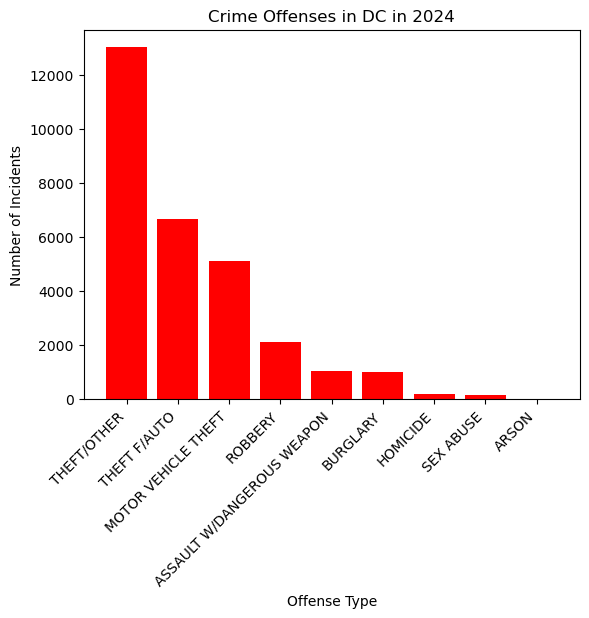

In [12]:
# looking at different types of offenses
plt.bar(crime['offense'].value_counts().index, crime['offense'].value_counts().values, color='red')
plt.xlabel("Offense Type")
plt.ylabel("Number of Incidents")
plt.title("Crime Offenses in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()

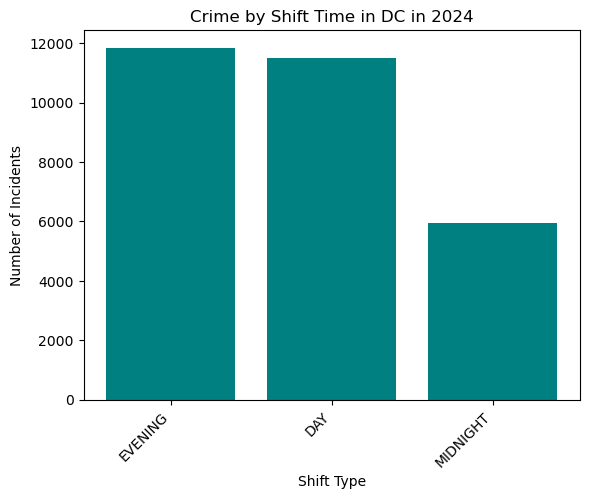

In [13]:
# looking at crimes for different shifts
plt.bar(crime['shift'].value_counts().index, crime['shift'].value_counts().values, color='teal')
plt.xlabel("Shift Type")
plt.ylabel("Number of Incidents")
plt.title("Crime by Shift Time in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()